# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

### Data Preparation and Data Cleaning

In [1]:
import os
import shutil
from google.colab import files

# Create 'data' folder
os.makedirs('data', exist_ok=True)

# Upload a file
uploaded = files.upload()

# Move the uploaded file to the 'data' folder
for filename in uploaded.keys():
    shutil.move(filename, f"data/{filename}")

Saving customer_booking.csv to customer_booking.csv


In [2]:
import pandas as pd

In [3]:
# Loading data

df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
# Data Description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
# Unique flight day

df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
# Mapping flight day into numbers

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
# Data Stats

df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [10]:
# Unique value and counts for categorical features

categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for sales_channel:
sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


Value counts for trip_type:
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64


Value counts for route:
route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
HKTJED       1
KBRWUH       1
KTMTWU       1
AKLHGH       1
MRUXIY       1
Name: count, Length: 799, dtype: int64


Value counts for booking_origin:
booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Ghana                       1
Gibraltar                   1
Guatemala                   1
Algeria                     1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64




### Encoding
sales_channel and trip_type (Low Cardinality)
Both have ≤3 categories → we can safely use:

Label Encoding (since RandomForest is tree-based and doesn't require one-hot) --->

In [11]:
# Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sales_channel'] = le.fit_transform(df['sales_channel'])
df['trip_type'] = le.fit_transform(df['trip_type'])


route and booking_origin (High Cardinality)
Preferred: Frequency Encoding
Since we have 799 unique route values and 104 booking_origin values, frequency encoding helps represent them compactly without blowing up dimensions.--->

In [12]:
# Frequency Encoding
df['route_freq'] = df['route'].map(df['route'].value_counts())
df['booking_origin_freq'] = df['booking_origin'].map(df['booking_origin'].value_counts())

# Droping the original columns after encoding
df.drop(['route', 'booking_origin'], axis=1, inplace=True)


In [13]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_freq,booking_origin_freq
0,2,0,2,262,19,7,6,1,0,0,5.52,0,20,1074
1,1,0,2,112,20,3,6,0,0,0,5.52,0,20,1074
2,2,0,2,243,22,17,3,1,1,0,5.52,0,20,1270
3,1,0,2,96,31,4,6,0,0,1,5.52,0,20,1074
4,2,0,2,68,22,15,3,1,0,1,5.52,0,20,1270


In [14]:
# Checking target column distribution

df['booking_complete'].value_counts()

,count
booking_complete,
0,42522
1,7478


### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("booking_complete", axis=1)  # Features
y = df["booking_complete"]               # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Building Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Automatically adjusts weights
    random_state=42
)


In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.56      0.09      0.15      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.54     10000
weighted avg       0.82      0.85      0.80     10000

ROC AUC Score: 0.771542984176053


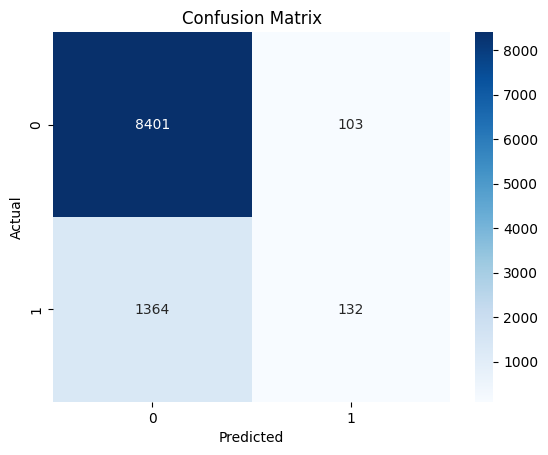

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # for ROC AUC

# Metrics
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


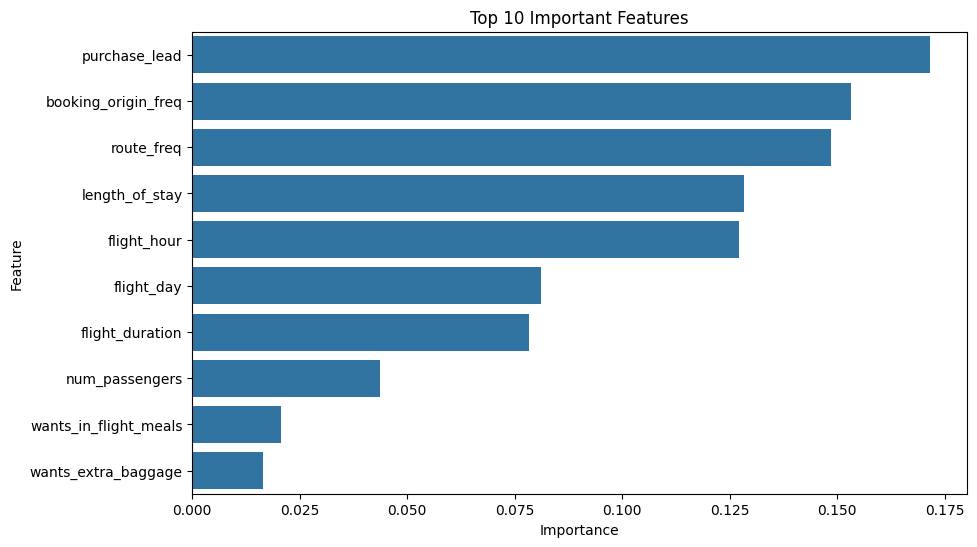

In [19]:
import pandas as pd
import numpy as np

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Average AUC across folds:", scores.mean())


Average AUC across folds: 0.4813514468246556


### Hyperparameter Tuning of Random Forest

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# Defining parameters

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}


In [26]:
# Initialize the classifier
rfc = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
rfc_random = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='f1'  # Focus on f1 for imbalanced data
)

# Fit to training data
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1', verbose=2)

In [27]:
# Best parameters
print("Best Parameters:\n", rfc_random.best_params_)

# Predict on test set using best estimator
best_model = rfc_random.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters:
 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'class_weight': 'balanced_subsample', 'bootstrap': True}
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.70      0.80      8504
           1       0.30      0.73      0.43      1496

    accuracy                           0.71     10000
   macro avg       0.62      0.72      0.61     10000
weighted avg       0.84      0.71      0.75     10000

Confusion Matrix:
 [[5966 2538]
 [ 406 1090]]


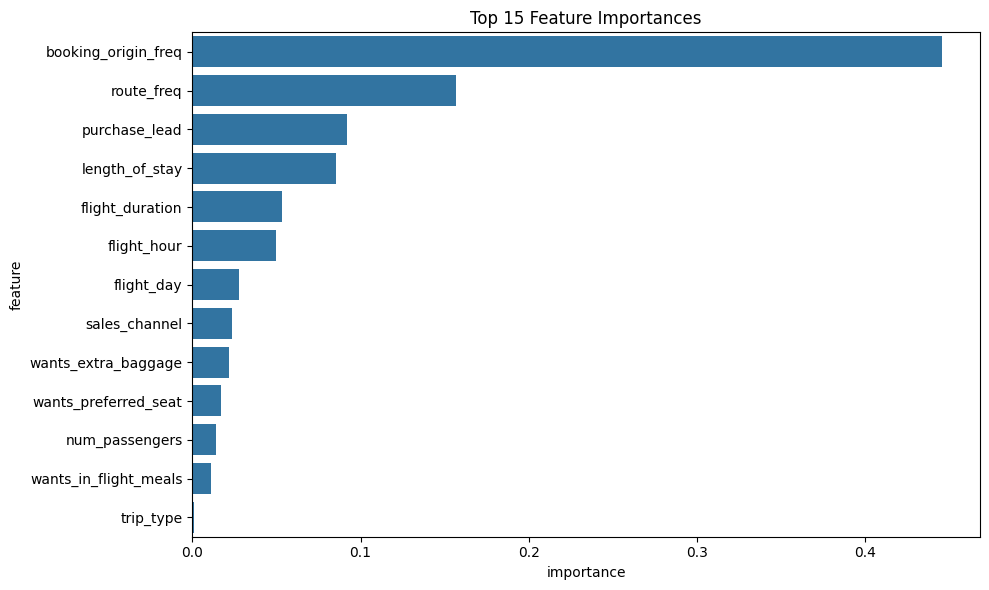

In [28]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

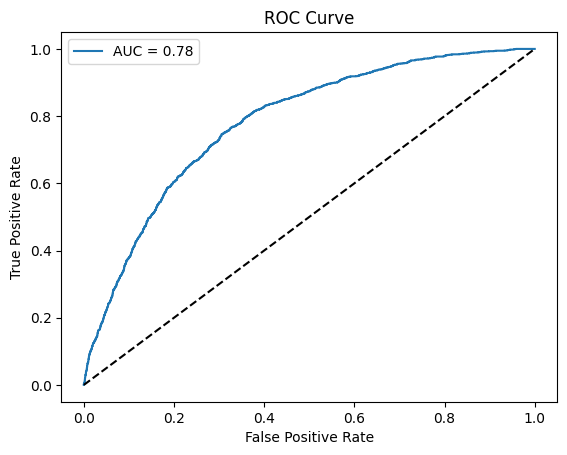

In [30]:
from sklearn.metrics import roc_curve, auc

y_probs = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Building XGBoost

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


In [17]:
# Handle Class Imbalance

from collections import Counter
scale_pos_weight = Counter(y_train)[0] / Counter(y_train)[1]

In [18]:
# Model Initialize

xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

In [19]:
xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:19:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [20]:
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.93      0.75      0.83      8504
           1       0.31      0.66      0.43      1496

    accuracy                           0.74     10000
   macro avg       0.62      0.70      0.63     10000
weighted avg       0.83      0.74      0.77     10000

AUC: 0.7772532570391536


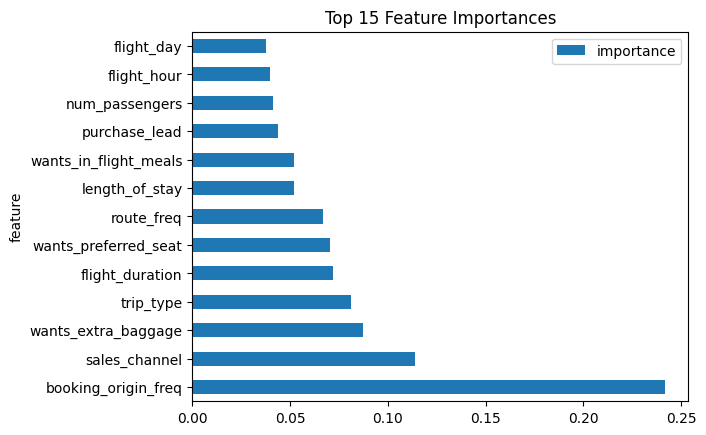

In [22]:
import matplotlib.pyplot as plt

importances = xgb.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
importance_df.sort_values(by='importance', ascending=False).head(15).plot(kind='barh', x='feature', y='importance', title='Top 15 Feature Importances')
plt.show()
